## Lab 1 - Gradient descent - algorytm najszybszego spadku

**Autor: Marcin Zwierzchowski**

In [333]:
import matplotlib.pyplot as plt
import numpy as np
import math
from autograd import grad

## 1. Definicja funkcji celu i funkcji pomocniczych

In [334]:
def fun1(x):
    return x[0]**2 + x[1]**2

def fun2(x):
    return x[0]**2 + 3*x[1]**2 - 500

def Matyas(x):
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]

# fun1(np.array([1.0, 4.0])) # calculate the value of the function at the point (1, 4)

In [335]:
def visualize_fun(obj_fun: callable, trajectory: np.ndarray):
    min_x, min_y = trajectory[-1]
    MIN_X = 10
    MAX_X = 10
    PLOT_STEP = 100

    x1 = np.linspace(-MIN_X, MAX_X, PLOT_STEP)
    x2 = np.linspace(-MIN_X, MAX_X, PLOT_STEP)
    X1, X2 = np.meshgrid(x1, x2)
    Z = obj_fun([X1, X2])

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X1, X2, Z, cmap='viridis', shading='auto')
    plt.colorbar(label='Objective Function Value')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Objective Function Visualization')

    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Gradient Descent Steps', alpha=0.5)
    plt.scatter(min_x, min_y, color='black', label='Minimum found by gradient descent alg.', s=50, zorder=5)


    plt.legend()
    plt.show()

## 2. Implementacja algorytmu gradient descent

In [ ]:
# it's better to keep prinint/debugging functionality outside of function. Return data and print it outside
def gradient_descent(x, fun, max_iter=10000, betha = 0.1, eps = 1e-3):
    trajectory = [x]
    iter = 0
    loss_fun = []
    
    while iter < max_iter:
        loss_fun.append(fun(x))
        d = grad(fun)(x)
        x_new = x - betha * d
        trajectory.append(x_new)
        # if np.linalg.norm(x_new - x) < eps:
        if np.linalg.norm(d) < eps:
            break
        x = x_new
        iter += 1

    if iter == max_iter:
        print(f'Betha = {betha} - The algorithm did not converged. {iter} iterations were performed.')
    else:
        print(f'Betha = {betha} - Number of iterations:', iter)
    # print('Loss function value at x0:', loss_fun[0])
    # print('Loss function value at x1:', loss_fun[1])
    return np.array(trajectory), loss_fun

## 3. Przykładowe użycie

In [337]:
x0 = np.array([-8.,7.]) # definicja punktu startowego

### 3.1 Funkcja f(x) = x1^2 + x2^2

Betha = 0.1 - Number of iterations: 45


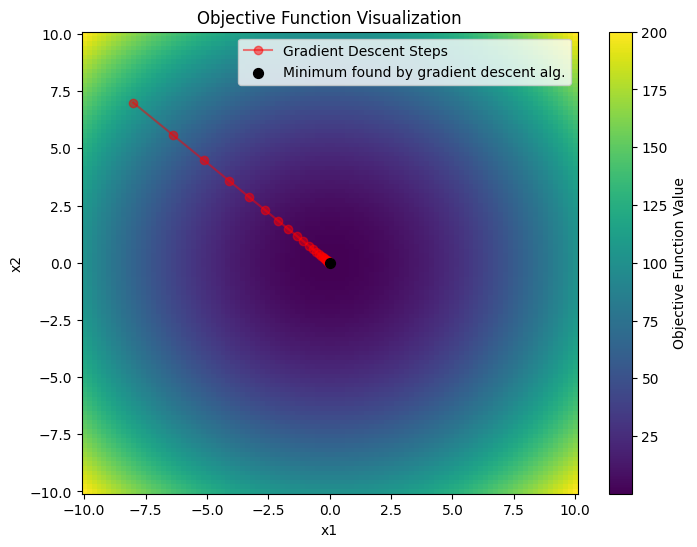

In [338]:
trajectory,_= gradient_descent(x0, fun1)
visualize_fun(fun1, trajectory)

### 3.1.1 Badanie wpływu wartości parametru kroku na zbieżność metody

Betha = 0.0001 - The algorithm did not converged. 10000 iterations were performed.
Betha = 0.001 - Number of iterations: 4978
Betha = 0.01 - Number of iterations: 494
Betha = 0.65 - Number of iterations: 9
Betha = 0.7 - Number of iterations: 11
Betha = 0.9 - Number of iterations: 45
Betha = 1 - The algorithm did not converged. 10000 iterations were performed.
Betha = 0.4 - Number of iterations: 7
Betha = 0.55 - Number of iterations: 5


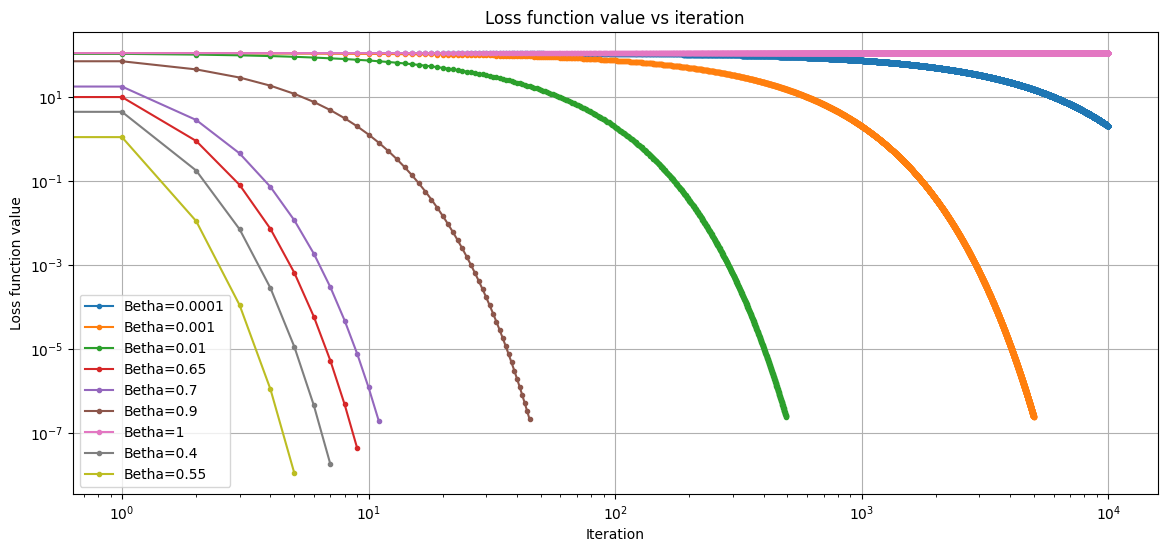

In [349]:
betha_values = [0.0001, 0.001, 0.01,   0.65, 0.7, 0.9, 1,0.4, 0.55]
plt.figure(figsize=(14, 6))
for betha in betha_values:
    trajectory, loss_fun_val = gradient_descent(x0, fun1, betha=betha)
    # visualize_fun(fun1, trajectory)
    plt.plot(loss_fun_val, label=f'Betha={betha}', marker='o', markersize=3)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss function value')
plt.title('Loss function value vs iteration')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

Komentarz: Z przebadanych wartość parametru betha najbardziej optymalna wartość to 0.55 , ponieważ zapewnia zbieżność w najmniejszej liczbie iteracji. Zwiększanie bethy zwiększa liczbę iteracji potrzebnych do zbieżności, a dla betha = 1 algorytm w ogóle nie osiąga zbieżności. Dla betha = 0.0001 prędość zbiegania do rozwiązania jest bardzo mała (małe kroki) i rozwiązanie nie jest osiągane przed liczbą maksymalnych iteracji.   

### 3.1.2 Badanie zachowanie algorytmu dla wybranych punktów startowych dla ustalonej wartości parametru kroku

Betha = 0.55 - Number of iterations: 5
Start point: (-8,7)


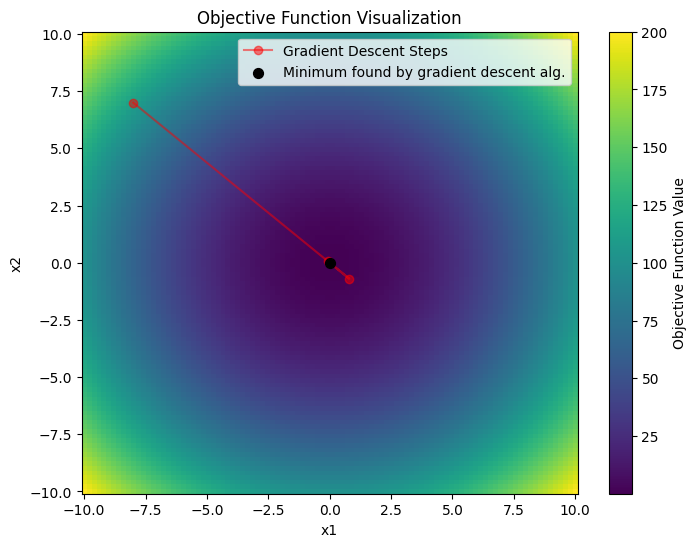

Betha = 0.55 - Number of iterations: 5
Start point: (-3,9)


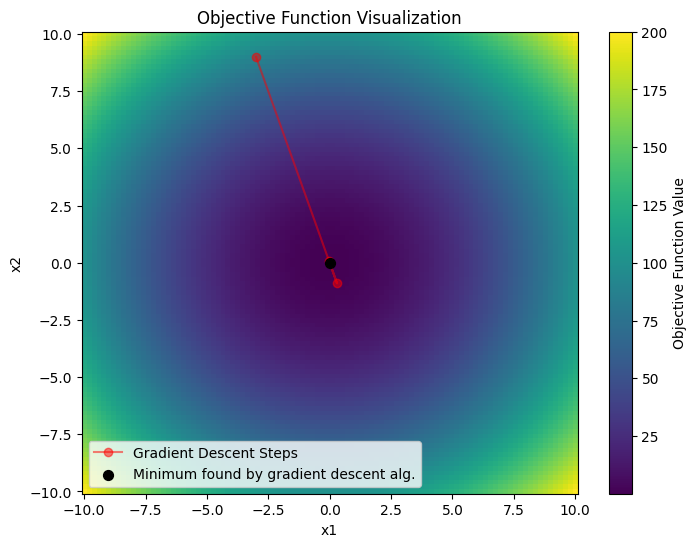

Betha = 0.55 - Number of iterations: 5
Start point: (-10,-7)


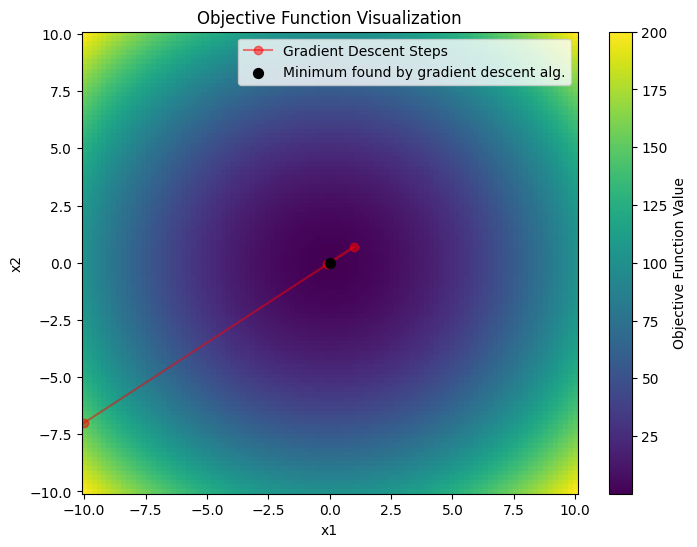

In [351]:
betha = 0.55

trajectory,_ = gradient_descent(np.array([-8.,7.]), fun1, betha = betha)
print("Start point: (-8,7)")
visualize_fun(fun1, trajectory)

trajectory,_ = gradient_descent(np.array([-3.,9.]), fun1, betha = betha)
print("Start point: (-3,9)")
visualize_fun(fun1, trajectory)

trajectory,_ = gradient_descent(np.array([-10.,-7.]), fun1, betha = betha)
print("Start point: (-10,-7)")
visualize_fun(fun1, trajectory)

# trajectory,_ = gradient_descent(np.array([1.,-1.]), Matyas, betha = betha)
# print("Start point: (-10,-7)")
# visualize_fun(Matyas, trajectory)

Komentarz: Dla betha = 0.55 przebadano działanie algorytmu dla trzech różnych punktów startowych. Dla każdego z przypadków algorytm osiągnął zbieżność w małej liczba iteracji jednak widać, że w trakcie pracy "przeskoczył" optymalne rozwiązanie. Świadczy to o tym, że współczynnik betha jest już bliski granicznej wartości, która powodowałaby większe oscylacji i brak zbieżności. Używanie bethy możliwie dużej, ale dającej zbieżność jest optymalne ze względu na liczbę potrzebnych iteracji. 

### 3.2 Funkcja Matyas

Betha = 1.99 - Number of iterations: 923


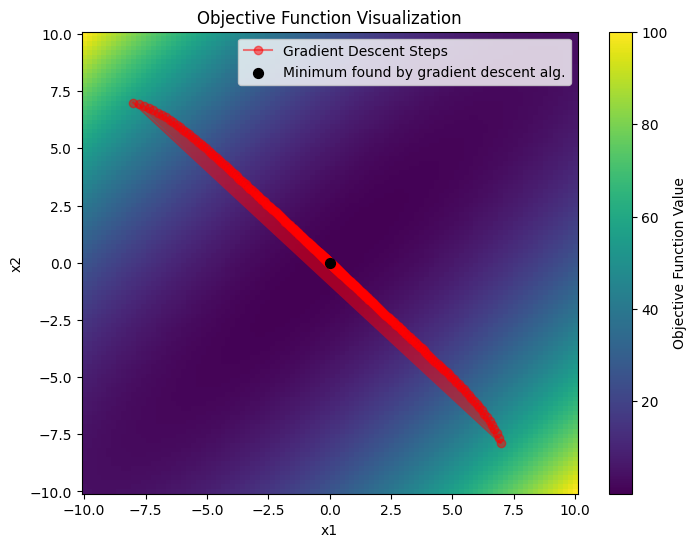

In [341]:
trajectory,_ = gradient_descent(x0, Matyas,
                                betha = 1.99)
visualize_fun(Matyas, trajectory)

### 3.2.1 Badanie wpływu wartości parametru kroku na zbieżność metody

Betha = 0.01 - Number of iterations: 8355
Betha = 0.1 - Number of iterations: 834
Betha = 0.5 - Number of iterations: 166
Betha = 0.9 - Number of iterations: 92
Betha = 1 - Number of iterations: 82
Betha = 1.1 - Number of iterations: 75
Betha = 1.9 - Number of iterations: 88
Betha = 1.5 - Number of iterations: 55
Betha = 1.99 - Number of iterations: 923
Betha = 2 - The algorithm did not converged. 10000 iterations were performed.


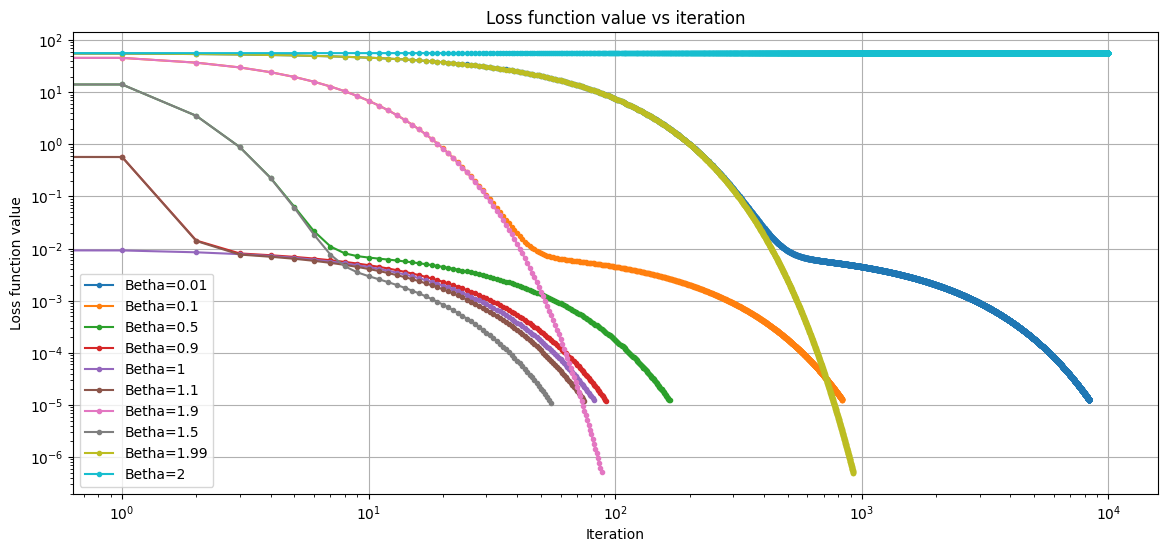

In [342]:
betha_values = [0.01, 0.1, 0.5, 0.9, 1, 1.1,1.9, 1.5,1.99, 2
                ]
plt.figure(figsize=(14, 6))
for betha in betha_values:
    trajectory, loss_fun_val = gradient_descent(x0, Matyas, betha=betha)
    # visualize_fun(fun1, trajectory)
    plt.plot(loss_fun_val, label=f'Betha={betha}', marker='o', markersize=3)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss function value')
plt.title('Loss function value vs iteration')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

Komentarz: Z przebadanych wartość parametru betha najbardziej optymalna wartość to 1.5 , ponieważ zapewnia zbieżność w najmniejszej liczbie iteracji. Kolejne wartości (1.9 i 1.99) na początku mają problemy ze zbieżnością (wartość funckji celu nie maleje), zaczynają się zbiegać w późniejszym momencie i sumarycznie do zbieżności potrzebują więcej iteracji. Dla betha = 2 algorytm nie osiągnął już zbieżności. 

### 3.2.2 Badanie zachowanie algorytmu dla wybranych punktów startowych dla ustalonej wartości parametru kroku

Betha = 1.5 - Number of iterations: 55
Start point: (-8,7)


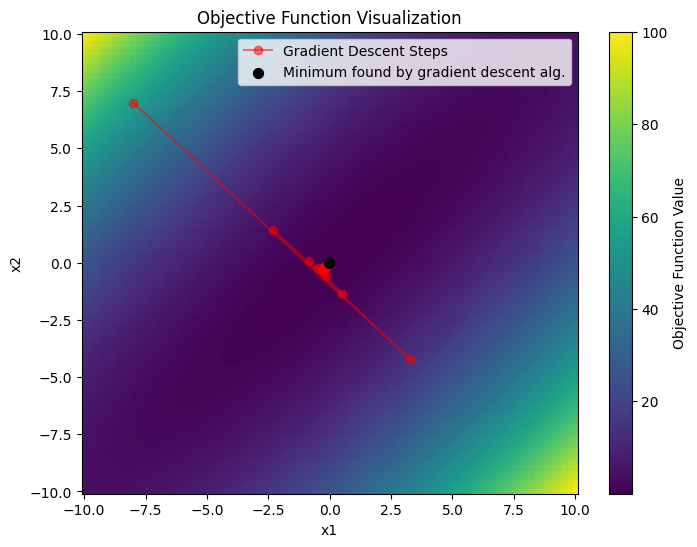

Betha = 1.5 - Number of iterations: 83
Start point: (-3,9)


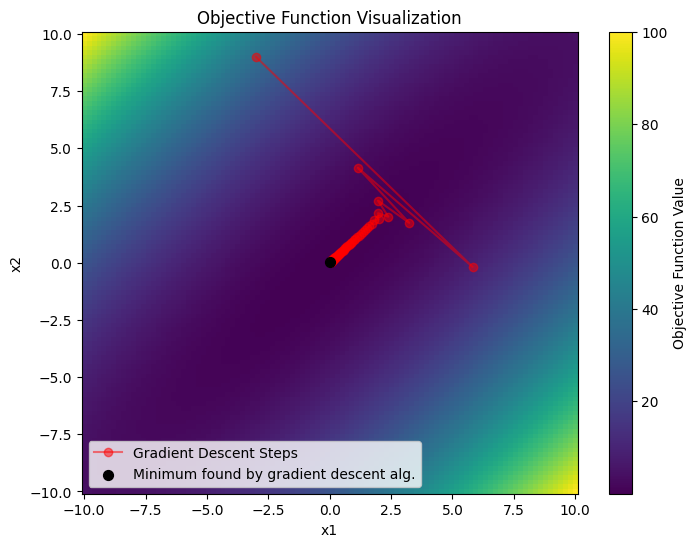

Betha = 1.5 - Number of iterations: 100
Start point: (-10,-7)


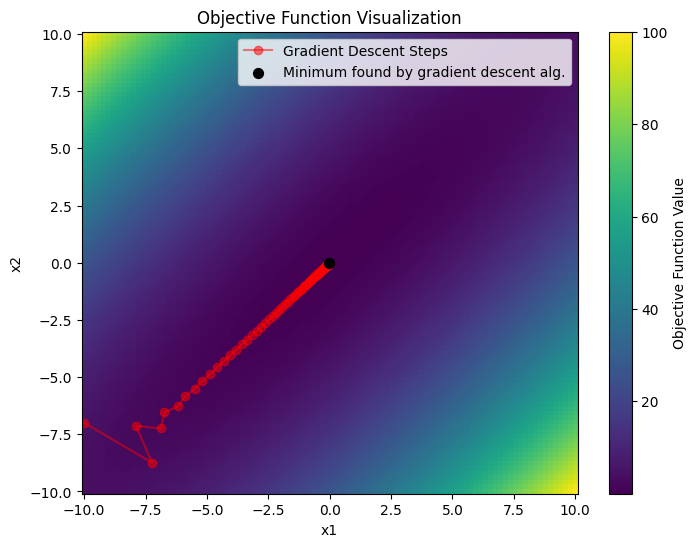

In [343]:
betha = 1.5

trajectory,_ = gradient_descent(np.array([-8.,7.]), Matyas, betha = betha)
print("Start point: (-8,7)")
visualize_fun(Matyas, trajectory)

trajectory,_ = gradient_descent(np.array([-3.,9.]), Matyas, betha = betha)
print("Start point: (-3,9)")
visualize_fun(Matyas, trajectory)

trajectory,_ = gradient_descent(np.array([-10.,-7.]), Matyas, betha = betha)
print("Start point: (-10,-7)")
visualize_fun(Matyas, trajectory)

# trajectory,_ = gradient_descent(np.array([1.,-1.]), Matyas, betha = betha)
# print("Start point: (-10,-7)")
# visualize_fun(Matyas, trajectory)

Komentarz: Dla betha = 1.5 przebadano działanie algorytmu dla trzech różnych punktów startowych. Dla każdego z przypadków algorytm osiągnął zbieżność jednak widać oscylacje w drodze do dochodzenia do rozwiązania. Świadczy to o tym, że współczynnik betha jest już bliski granicznej wartości, która powodowałaby brak zbieżności.  